# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Diah Pitaloka Rachmawati
- **Email:** diahpitaaa@gmail.com
- **ID Dicoding:** diahpitaa

## Menentukan Pertanyaan Bisnis

1. Bagaimana distribusi penilaian (rating) dari penjualan produk berdasarkan kategori produknya?
2. Apa jenis pembayaran yang paling sering digunakan dan yang jarang digunakan dalam transaksi?
3. Apa jenis pembayaran yang paling sering digunakan dan yang jarang digunakan dalam transaksi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_6168\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Wrangling

### Gathering Data

#### Table Customers

In [2]:
# Memuat table customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Table Orders

In [3]:
# Memuat table orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Memuat table item order
item_orders_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/order_items_dataset.csv")
item_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Memuat table payment order
payment_orders_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/order_payments_dataset.csv")
payment_orders_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Memuat table review order
review_orders_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/order_reviews_dataset.csv")
review_orders_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Table Product

In [7]:
# Memuat table products
products_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# Memuat table category product
category_products_translate_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/product_category_name_translation.csv")
category_products_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Table Sellers

In [9]:
# Memuat table sellers
sellers_df = pd.read_csv("https://raw.githubusercontent.com/diahpitaaa/Proyek_Analisis_Data/main/src/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Assessing Data customers_df

In [10]:
# Menilai data customers_df
print(customers_df.info(), "\n")
# Memeriksa missing value pada customers_df
print(customers_df.isna().sum(), "\n")
# Melihat adanya duplikasi
print("Jumlah duplikasi : ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Jumlah duplikasi :  0


#### Assessing Data orders_df

In [11]:
# Menilai data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Ditemukan adanya tipe data yang tidak sesuai pada *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, *order_estimated_delivery_date*.

In [12]:
# Memeriksa missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Ditemukan data yang kosong pada orders_df

In [14]:
# Memeriksa adanya duplikasi
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


#### Assessing Data item_orders_df


In [15]:
# Menilai data item_orders_df
item_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Mengecek duplikasi
print("Jumlah duplikasi : ", item_orders_df.duplicated().sum())

Jumlah duplikasi :  0


#### Assessing Data payment_orders_df

In [17]:
# Menilai data payment_orders_df.info()
payment_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
# Mengecek duplikasi
print("Jumlah duplikasi : " ,payment_orders_df.duplicated().sum())

Jumlah duplikasi :  0


#### Assessing Data review_orders_df

In [19]:
# Menilai data review_orders_df
review_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
# Mengecek adanya missing value
review_orders_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
# Mengecek adanya duplikasi
print("Jumlah duplikasi : ", review_orders_df.duplicated().sum())

Jumlah duplikasi :  0


#### Assessing Data products_df

In [22]:
# Menilai data products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [23]:
# Memeriksa missing value pada products_df
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Ditemukan data kosong pada products_df

In [24]:
# Melihat adanya inaccurate value pada products_df
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [25]:
# Memeriksa adanya duplikasi
print("Jumlah duplikat : ", products_df.duplicated().sum())

Jumlah duplikat :  0


#### Assessing Data category_products_translate_df

In [26]:
# Menilai data category_products_translate_df
category_products_translate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
# Mengecek data duplikat
print("Jumlah data duplicat : ",category_products_translate_df.duplicated().sum())

Jumlah data duplicat :  0


### Assessing Data sellers_df

In [28]:
# Menilai data sellers_df
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [29]:
# Mengecek adanya data duplikat
print("Jumlah duplikat : " ,sellers_df.duplicated().sum())

Jumlah duplikat :  0


### Cleaning Data

#### Cleaning Data pada orders_df

In [30]:
# Mengubah tipe data pada orders_df
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for columns in datetime_columns:
    orders_df[columns] = pd.to_datetime(orders_df[columns])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [31]:
# Menghapus data yang kosong pada orders_df
orders_df.dropna(axis=0, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Cleaning Data pada item_orders_df

In [32]:
# Mengubah tipe data shipping_limit_date
item_orders_df['shipping_limit_date'] = pd.to_datetime(item_orders_df['shipping_limit_date'])
item_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning Data pada payment_orders_df

In [33]:
payment_orders_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [34]:
# Mengecek missing value pada payment_orders_df
payment_orders_df[payment_orders_df.payment_value == payment_orders_df.payment_value.min()]

# Melakukan hapus data
payment_orders_df.drop(payment_orders_df[(payment_orders_df['payment_value'] == 0) & (payment_orders_df['payment_type'] == 'not_defined')].index, inplace=True)

#Melihat data mana saja yang memiliki payment_value yang 0
payment_orders_df[payment_orders_df.payment_value == payment_orders_df.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


#### Cleaning Data pada review_orders_df

In [55]:
# Mengecek missing value pada review_orders_df
review_orders_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [58]:
review_orders_df[review_orders_df.review_comment_title.isna()]
review_orders_df[review_orders_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [62]:
# Menghapus data
review_orders_df.dropna(axis=0, inplace=True)
review_orders_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Cleaning Data pada products_df

In [35]:
# Menghapus data yang kosong pada products_df
products_df.dropna(axis=0, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [36]:
# Mengecek inaccurate value pada kolom weight
products_df[products_df.product_weight_g == products_df.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [37]:
# Untuk menangani innacurate value, saya akan menggunakan metode imputation untuk mengganti value
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = products_df['product_weight_g'].median()
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2277.043166,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.252856,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Exploratory Data Analysis (EDA)

### Eksplorasi data customers_df

In [38]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Mencoba melihat persebaran jumlah pelanggan berdasarkan kota (city) dan negara bagian (state)

In [100]:
customer_city_counts = customers_df['customer_city'].value_counts().reset_index()
customer_city_counts.columns = ['customer_city', 'customer_count']

city_customer = customer_city_counts.sort_values(by='customer_count', ascending=False)

print(city_customer)

          customer_city  customer_count
0             sao paulo           15540
1        rio de janeiro            6882
2        belo horizonte            2773
3              brasilia            2131
4              curitiba            1521
...                 ...             ...
3362  palmares paulista               1
3363     pires ferreira               1
3364      vicente dutra               1
3365        alagoa nova               1
4118  eugenio de castro               1

[4119 rows x 2 columns]


### Eksplorasi data item_orders_df dan products_df

In [40]:
item_orders_df.head()
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [41]:
merged_items_product_df = item_orders_df.merge(products_df, on='product_id', how='inner')
merged_items_product_df.describe()

,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111046.000000,111046,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000
mean,1.198215,2018-01-08 10:09:32.626182144,120.762337,20.025149,48.775877,787.866335,2.209706,2100.030087,30.211003,16.626362,23.041956
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,1.000000,2017-09-21 04:50:18.750000128,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,2018-01-28 23:19:02,74.990000,16.300000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,2018-05-11 00:26:54.249999872,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,0.706875,NaN,183.339790,15.840629,10.025570,652.138503,1.721445,3754.761721,16.189352,13.467460,11.716659


In [42]:
# Melihat apakah semakin besar nilai dari length, height, width juga semakin besar pula nilai freight value ?
# Melakukan sort volume tersebar hingga terkecil lalu ascendingkan dan bandingkan dengan volume terkecil apakah freight value berpengaruh?
merged_items_product_df["volumeBarang"] = merged_items_product_df["product_length_cm"]*merged_items_product_df["product_height_cm"]*merged_items_product_df["product_width_cm"]
sorted = merged_items_product_df.sort_values(by="volumeBarang", ascending=True)
selected_columns=sorted[["volumeBarang","freight_value"]]
print(selected_columns.sort_values(by="volumeBarang", ascending=False))

        volumeBarang  freight_value
68813       296208.0         339.59
19225       294000.0         163.52
19226       294000.0         163.52
15898       294000.0         119.29
59376       294000.0         120.19
...              ...            ...
71343          352.0          19.04
177            352.0           8.16
6969           352.0           7.78
160            288.0          20.85
105688         168.0          27.05

[111046 rows x 2 columns]


In [43]:
correlation = selected_columns["volumeBarang"].corr(selected_columns["freight_value"])
print("Korelasi antara Volume Barang dan Freight Value:", correlation)

Korelasi antara Volume Barang dan Freight Value: 0.5876008947927344


### Eksplorasi data payment_orders_df

In [45]:
payment_counts = payment_orders_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment type', 'Jumlah']

# Mengurutkan berdasarkan jumlah customer secara descending
sorted_payments_customers = payment_counts.sort_values(by='Jumlah', ascending=False)

print(sorted_payments_customers)

  payment type  Jumlah
0  credit_card   76795
1       boleto   19784
2      voucher    5775
3   debit_card    1529


### Eksplorasi data review_orders_df, item_orders_df, products_df

In [48]:
reviews_counts = review_orders_df['review_score'].value_counts().reset_index()
reviews_counts.columns = ['review_score', 'Jumlah']

# Mengurutkan berdasarkan jumlah customer secara descending
sorted_review_customers = reviews_counts.sort_values(by='Jumlah', ascending=False)

print(sorted_review_customers)

   review_score  Jumlah
0             5   57328
1             4   19142
2             1   11424
3             3    8179
4             2    3151


In [64]:
merged_review_df = review_orders_df.merge(merged_items_product_df, on='order_id', how='inner')
merged_review_df = merged_review_df.merge(category_products_translate_df, on='product_category_name', how='inner' )

merged_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11459 entries, 0 to 11458
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   review_id                      11459 non-null  object        
 1   order_id                       11459 non-null  object        
 2   review_score                   11459 non-null  int64         
 3   review_comment_title           11459 non-null  object        
 4   review_comment_message         11459 non-null  object        
 5   review_creation_date           11459 non-null  object        
 6   review_answer_timestamp        11459 non-null  object        
 7   order_item_id                  11459 non-null  int64         
 8   product_id                     11459 non-null  object        
 9   seller_id                      11459 non-null  object        
 10  shipping_limit_date            11459 non-null  datetime64[ns]
 11  price          

In [65]:
merged_data = merged_review_df.merge(products_df, on='product_id', how='inner')
grouped_data = merged_data.groupby(['product_category_name_english', 'review_score']).size().reset_index(name='Jumlah')
print(grouped_data.sort_values(by='Jumlah', ascending=False))

    product_category_name_english  review_score  Jumlah
161                 health_beauty             5     615
37                 bed_bath_table             5     601
273                 watches_gifts             5     460
188                    housewares             5     443
252                sports_leisure             5     416
..                            ...           ...     ...
47                books_technical             3       1
97            diapers_and_hygiene             1       1
121       fashion_underwear_beach             1       1
223                party_supplies             4       1
50              cds_dvds_musicals             5       1

[274 rows x 3 columns]


In [ ]:
Data menunjukan health_beauty menunjukan product dengan jumlah review dengan bintang 5

#### Eksplorasi data orders_df, item_orders_df, products_df

In [67]:
merged_order_df = orders_df.merge(merged_items_product_df, on='order_id', how='inner')
merged_order_df = merged_order_df.merge(category_products_translate_df, on='product_category_name', how='inner' )
merged_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108621 entries, 0 to 108620
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108621 non-null  object        
 1   customer_id                    108621 non-null  object        
 2   order_status                   108621 non-null  object        
 3   order_purchase_timestamp       108621 non-null  datetime64[ns]
 4   order_approved_at              108621 non-null  datetime64[ns]
 5   order_delivered_carrier_date   108621 non-null  datetime64[ns]
 6   order_delivered_customer_date  108621 non-null  datetime64[ns]
 7   order_estimated_delivery_date  108621 non-null  datetime64[ns]
 8   order_item_id                  108621 non-null  int64         
 9   product_id                     108621 non-null  object        
 10  seller_id                      108621 non-null  object        
 11  

In [68]:
grouped_order_dataset = merged_data.groupby(['product_category_name_english']).size().reset_index(name='Jumlah')
print(grouped_order_dataset.sort_values(by='Jumlah', ascending=False))

   product_category_name_english  Jumlah
7                 bed_bath_table    1178
40                 health_beauty    1097
65                 watches_gifts     927
46                    housewares     911
60                sports_leisure     734
..                           ...     ...
25                  dvds_blu_ray       3
11             cds_dvds_musicals       1
62        tablets_printing_image       1
28     fashion_childrens_clothes       1
33                       flowers       1

[66 rows x 2 columns]


In [70]:
# Kategori produk yang paling diminati (maksimum jumlah pesanan)
most_popular = grouped_order_dataset[grouped_order_dataset['Jumlah'] == grouped_order_dataset['Jumlah'].max()]

# Kategori produk yang paling tidak diminati (minimum jumlah pesanan)
least_popular = grouped_order_dataset[grouped_order_dataset['Jumlah'] == grouped_order_dataset['Jumlah'].min()]

print("Kategori produk yang banyak dicari : ")
print(most_popular)

print("Kategori produk yang sedikit dicari : ")
print(least_popular)

Kategori produk yang banyak dicari : 
  product_category_name_english  Jumlah
7                bed_bath_table    1178
Kategori produk yang sedikit dicari : 
   product_category_name_english  Jumlah
11             cds_dvds_musicals       1
28     fashion_childrens_clothes       1
33                       flowers       1
62        tablets_printing_image       1


## Visualization & Explanatory Analysis

#### Bagaimana distribusi penilaian (rating) dari penjualan produk berdasarkan kategori produknya?

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_6168\1256926237.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Jumlah", y="product_category_name_english", data=top_categories, palette=colors, ax=ax1)
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_6168\1256926237.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Jumlah", y="product_category_name_english", data=worst_categories, palette=colors, ax=ax2)


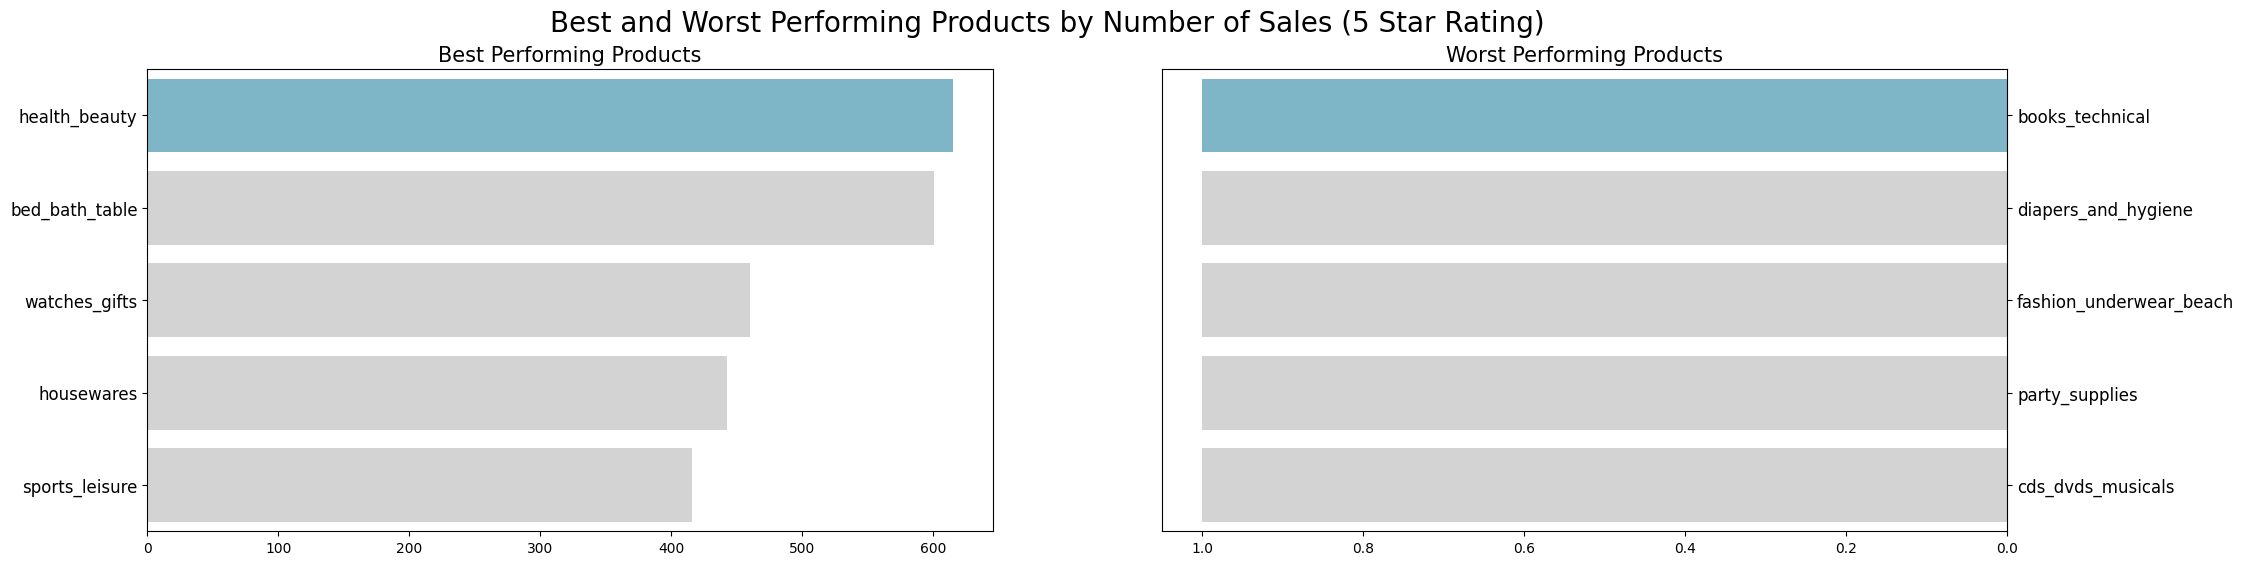

In [112]:
# Sort the data
sorted_data = grouped_data.sort_values(by="Jumlah", ascending=False)

# Select top and worst 5 categories
top_categories = sorted_data.head(5)
worst_categories = sorted_data.tail(5)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Bar plot for the top categories
sns.barplot(x="Jumlah", y="product_category_name_english", data=top_categories, palette=colors, ax=ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_title("Best Performing Products", loc="center", fontsize=15)
ax1.tick_params(axis='y', labelsize=12)

# Bar plot for the worst categories
sns.barplot(x="Jumlah", y="product_category_name_english", data=worst_categories, palette=colors, ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_title("Worst Performing Products", loc="center", fontsize=15)
ax2.tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Products by Number of Sales (5 Star Rating)", fontsize=20)
plt.show()

#### Berapa persentase pesanan yang tiba sesuai atau bahkan lebih cepat dari perkiraan waktu pengiriman?

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_6168\61081436.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_city", y="customer_count", data=top_5_customers_location, palette=colors, ax=ax)


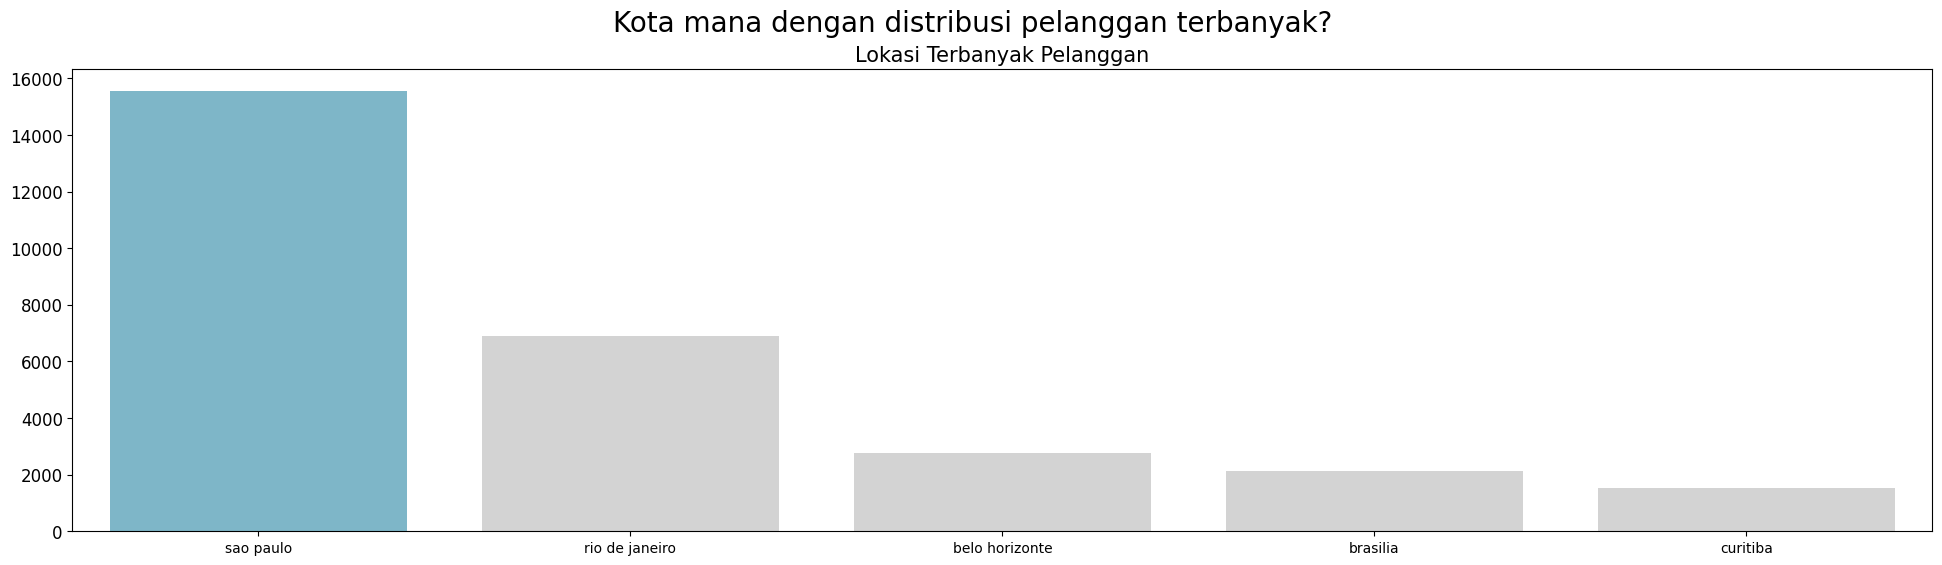

In [110]:
customers_city = city_customer.sort_values(by="customer_count", ascending=False)

# Ambil 5 kategori teratas
top_5_customers_location = sorted_city_customers.head(5)

# Buat plot
fig, ax = plt.subplots(figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="customer_city", y="customer_count", data=top_5_customers_location, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Lokasi Terbanyak Pelanggan", loc="center", fontsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.suptitle("Kota mana dengan distribusi pelanggan terbanyak?", fontsize=20)
plt.show()


#### Apa jenis pembayaran yang paling sering digunakan dan yang jarang digunakan dalam transaksi?

Text(0.5, 1.0, 'Persentase Pembayaran Berdasarkan Jenis Pembayaran')

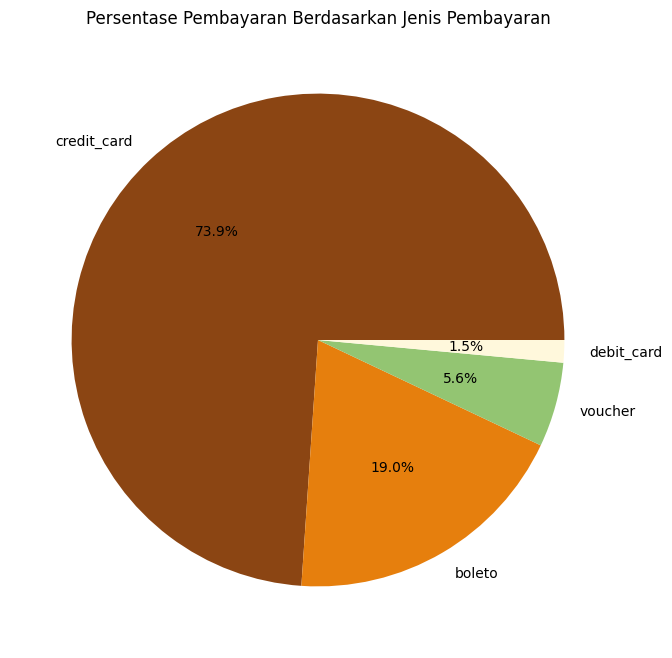

In [111]:
# Data
data_label = payment_counts['payment type']
votes = payment_counts['Jumlah']
colors = ('#8B4513','#E67F0D', '#93C572', '#FFF8DC')
explode = (0, 0,0,0)

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(votes, labels=data_label, autopct='%1.1f%%', colors=colors)

# Tambahkan judul
plt.title("Persentase Pembayaran Berdasarkan Jenis Pembayaran")

# Tampilkan pie chart